In [1]:
#Importing pandas, numpy, seaborn and matplotlib Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import covid 19 USA Dataset
corona_dataset_csv = pd.read_csv("/content/drive/My Drive/UST/time_series_covid19_confirmed_US.csv")
corona_dataset_csv.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

In [4]:
import re

In [5]:
#Droping Useless coloumns from the dataset
df = corona_dataset_csv.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_"],axis=1)

In [6]:
df.head()

Province_State Country_Region          Combined_Key  1/22/20  1/23/20  \
0        Alabama             US  Autauga, Alabama, US        0        0   
1        Alabama             US  Baldwin, Alabama, US        0        0   
2        Alabama             US  Barbour, Alabama, US        0        0   
3        Alabama             US     Bibb, Alabama, US        0        0   
4        Alabama             US   Blount, Alabama, US        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  2/28/23  3/1/23  3/2/23  \
0        0        0        0        0        0  ...    19732   19759   19759   
1        0        0        0        0        0  ...    69641   69767   69767   
2        0        0        0        0        0  ...     7451    7474    7474   
3        0        0        0        0        0  ...     8067    8087    8087   
4        0        0        0        0        0  ...    18616   18673   18673   

   3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19759   19759   19759   19790   19790  
1   69767   69767   69767   69767   69767   69860   69860  
2    7474    7474    7474    7474    7474    7485    7485  
3    8087    8087    8087    8087    8087    8091    8091  
4   18673   18673   18673   18673   18673   18704   18704  

[5 rows x 1146 columns]

In [7]:
new_df = df.iloc[:, :3].copy()

# Use regular expressions to filter columns matching the updated 'x/xx/20' format
pattern = r'^(12|11|10|9|8|7)/(3[0-1]|[12][0-9]|[1-9])/21$'
filtered_columns = [col for col in df.columns if re.match(pattern, col)]

# Keep only the columns that match the pattern
df = df[filtered_columns]

# Now, df contains the first 3 columns and any columns that match the updated format
print(df)

      7/1/21  7/2/21  7/3/21  7/4/21  7/5/21  7/6/21  7/7/21  7/8/21  7/9/21  \
0       7257    7262    7262    7262    7262    7262    7277    7277    7294   
1      22027   22043   22043   22043   22043   22043   22154   22154   22220   
2       2346    2347    2347    2347    2347    2347    2354    2354    2361   
3       2693    2693    2693    2693    2693    2693    2699    2699    2699   
4       6987    6988    6988    6988    6988    6988    7013    7013    7018   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3337    3801    3802    3802    3802    3802    3804    3805    3807    3816   
3338    2320    2321    2321    2321    2321    2325    2327    2328    2329   
3339       0       0       0       0       0       0       0       0       0   
3340     926     927     927     927     927     927     927     929     929   
3341     658     661     661     661     661     661     663     663     664   

      7/10/21  ...  12/22/21  12/23/21 

In [8]:
combined_df = pd.concat([new_df, df], axis=1)
combined_df.head()

df=combined_df

In [9]:
#Grouping the Dataset with only one coloumn as it consist of (city, state, country)
corona_dataset_aggregated = df.groupby("Combined_Key").sum()

<ipython-input-9-b2ff03d8543d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_dataset_aggregated = df.groupby("Combined_Key").sum()


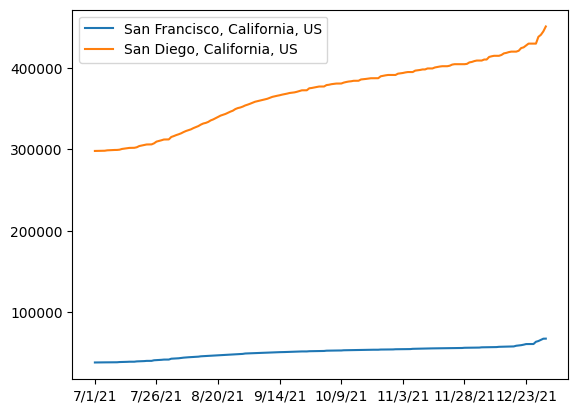

In [10]:
#Visualizing data related to a particular row by plotting graph b/w cities with x-axis as "date" and y-axis as "COVID Cases"
corona_dataset_aggregated.loc["San Francisco, California, US"].plot()
corona_dataset_aggregated.loc["San Diego, California, US"].plot()
plt.legend()

<Axes: >

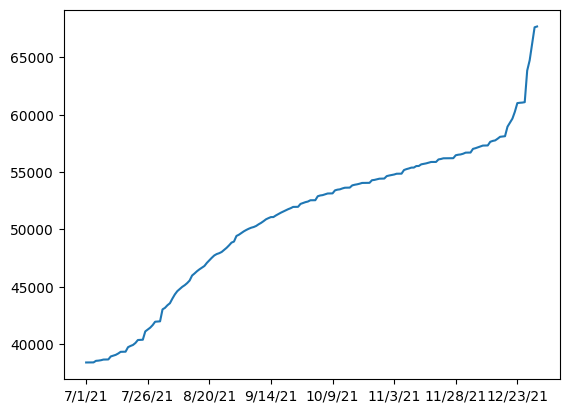

In [11]:
corona_dataset_aggregated.loc["San Francisco, California, US"].plot()


<Axes: >

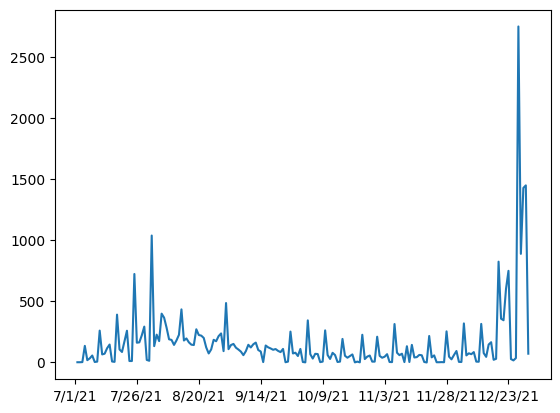

In [12]:
#calculating and Plotting first derivative of Curve
corona_dataset_aggregated.loc["San Francisco, California, US"].diff().plot()

In [13]:
#First derivative of all cities i.e., Max infection rate of all cities
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
  max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [14]:
#changing the Data Frame to corona_data
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [15]:
#Maximum infection rate oa all the cities in US

corona_data.head()

max_infection_rate
Combined_Key                                     
Abbeville, South Carolina, US               137.0
Acadia, Louisiana, US                       217.0
Accomack, Virginia, US                       67.0
Ada, Idaho, US                              707.0
Adair, Iowa, US                              42.0

In [16]:
#Importing Another Dataset - Number of deaths in each city of USA
corona_dataset_csv = pd.read_csv("/content/drive/My Drive/UST/time_series_covid19_deaths_US.csv")
corona_dataset_csv.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 9/24/21  9/25/21  9/26/21  9/27/21  9/28/21  \
0  32.539527 -86.644082  ...     137      137      137      137      139   
1  30.727750 -87.722071  ...     489      495      495      495      501   
2  31.868263 -85.387129  ...      70       70       70       70       70   
3  32.996421 -87.125115  ...      80       81       81       81       83   
4  33.982109 -86.567906  ...     156      157      157      157      160   

   9/29/21  9/30/21  10/1/21  10/2/21  10/3/21  
0      140      140      142      142      142  
1      505      509      514      518      518  
2       70       71       71       71       71  
3       83       83       83       83       83  
4      160      160      161      162      162  

[5 rows x 633 columns]

In [17]:
#Removing Uselesss Coloumns
df1 = corona_dataset_csv.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_"],axis=1)

In [18]:
df1.head()

Province_State Country_Region          Combined_Key  Population  1/22/20  \
0        Alabama             US  Autauga, Alabama, US       55869        0   
1        Alabama             US  Baldwin, Alabama, US      223234        0   
2        Alabama             US  Barbour, Alabama, US       24686        0   
3        Alabama             US     Bibb, Alabama, US       22394        0   
4        Alabama             US   Blount, Alabama, US       57826        0   

   1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  9/24/21  9/25/21  \
0        0        0        0        0        0  ...      137      137   
1        0        0        0        0        0  ...      489      495   
2        0        0        0        0        0  ...       70       70   
3        0        0        0        0        0  ...       80       81   
4        0        0        0        0        0  ...      156      157   

   9/26/21  9/27/21  9/28/21  9/29/21  9/30/21  10/1/21  10/2/21  10/3/21  
0      137      137      139      140      140      142      142      142  
1      495      495      501      505      509      514      518      518  
2       70       70       70       70       71       71       71       71  
3       81       81       83       83       83       83       83       83  
4      157      157      160      160      160      161      162      162  

[5 rows x 625 columns]

In [19]:
new_df = df.iloc[:, :3].copy()

# Use regular expressions to filter columns matching the updated 'x/xx/20' format
pattern = r'^(12|11|10|9|8|7)/(3[0-1]|[12][0-9]|[1-9])/21$'
filtered_columns = [col for col in df1.columns if re.match(pattern, col)]

# Keep only the columns that match the pattern
df1 = df1[filtered_columns]

# Now, df contains the first 3 columns and any columns that match the updated format
print(df1)

      7/1/21  7/2/21  7/3/21  7/4/21  7/5/21  7/6/21  7/7/21  7/8/21  7/9/21  \
0        113     113     113     113     113     113     113     113     113   
1        315     315     315     315     315     315     316     316     317   
2         60      60      60      60      60      60      60      60      60   
3         64      64      64      64      64      64      65      65      65   
4        139     139     139     139     139     139     139     139     139   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
3337      11      11      11      11      11      11      11      11      11   
3338      13      13      13      13      13      13      13      13      13   
3339       0       0       0       0       0       0       0       0       0   
3340      26      26      26      26      26      26      26      26      26   
3341       6       6       6       6       6       6       6       6       6   

      7/10/21  ...  9/24/21  9/25/21  9

In [20]:
combined_df = pd.concat([new_df, df], axis=1)
combined_df.head()
df1 = combined_df

In [21]:
df1 = corona_dataset_csv.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_"],axis=1)

In [22]:
#Grouping the Dataset with only one coloumn as it consist of (city, state, country)
corona_death_aggregated = df1.groupby("Combined_Key").sum(numeric_only=True)


In [23]:
#Calculatinf First Derivative for deaths i.e., Maximum Deaths in each city of US
countries = list(corona_death_aggregated.index)
max_death_rates = []
for c in countries :
  max_death_rates.append(corona_death_aggregated.loc[c].diff().max())
corona_death_aggregated["max_death_rate"] = max_death_rates

In [24]:
corona_death = pd.DataFrame(corona_death_aggregated["max_death_rate"])


In [25]:
#Maximum Deaths of each city in USA
corona_death.head()

max_death_rate
Combined_Key                                 
Abbeville, South Carolina, US             3.0
Acadia, Louisiana, US                     7.0
Accomack, Virginia, US                    3.0
Ada, Idaho, US                           21.0
Adair, Iowa, US                           5.0

In [26]:
#Joining max infection rate and max death rate column

cases = corona_data.join(corona_death,how="inner")
cases.head()

max_infection_rate  max_death_rate
Combined_Key                                                     
Abbeville, South Carolina, US               137.0             3.0
Acadia, Louisiana, US                       217.0             7.0
Accomack, Virginia, US                       67.0             3.0
Ada, Idaho, US                              707.0            21.0
Adair, Iowa, US                              42.0             5.0

In [27]:
#Correlation Matrix b/w max infection rate and max death rate
cases.corr()

max_infection_rate  max_death_rate
max_infection_rate            1.000000        0.440087
max_death_rate                0.440087        1.000000

<Axes: xlabel='max_infection_rate', ylabel='max_death_rate'>

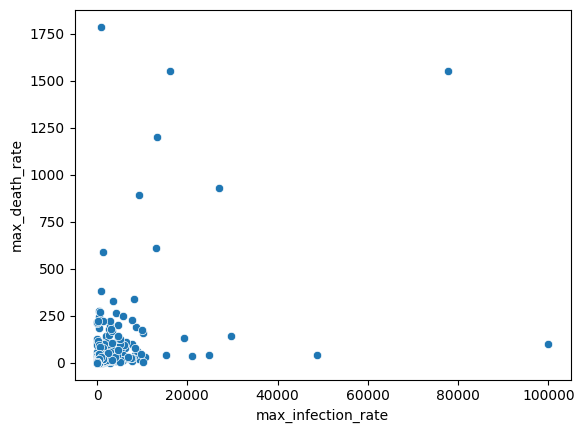

In [28]:
#Plotting Scatterplot graph b/w Max Infection rate Vs Max Death Rate to see relation b/w them
import seaborn as sns

# Assuming you have x and y data
x = cases["max_infection_rate"]
\
y = cases["max_death_rate"]

# Create a scatterplot
sns.scatterplot(x=x, y=y)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Axes: xlabel='max_infection_rate', ylabel='max_death_rate'>

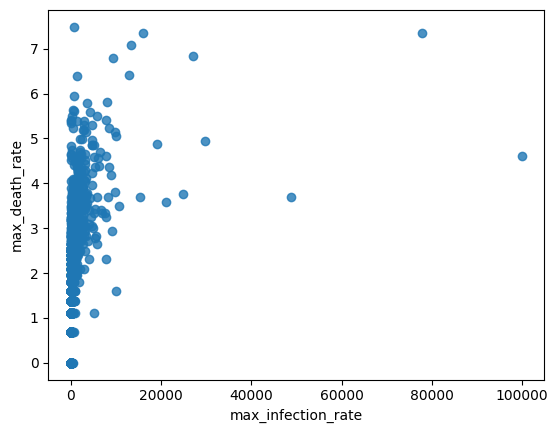

In [29]:
sns.regplot(x=x,y=np.log(y))


In [30]:
#importing hidden markov model library
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.0 MB/s eta 0:00:00


In [31]:
ir=np.array(cases['max_infection_rate'])
dr=np.array(cases['max_death_rate'])
features=np.column_stack((ir,dr))

In [32]:
from hmmlearn.hmm import GaussianHMM
score_list=[]
hmm=GaussianHMM(n_components=3)
hmm.fit(features)


GaussianHMM(n_components=3)

In [33]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(cases, test_size=0.33, shuffle=False)
ir_train=np.array(train['max_infection_rate'])
dr_train=np.array(train['max_death_rate'])
train_features=np.column_stack((ir_train,dr_train))

ir_test=np.array(test['max_infection_rate'])
dr_test=np.array(test['max_death_rate'])
test_features=np.column_stack((ir_test,dr_test))

In [34]:
from hmmlearn.hmm import GaussianHMM
hm=GaussianHMM(n_components=4)
hm.fit(train_features)

GaussianHMM(n_components=4)

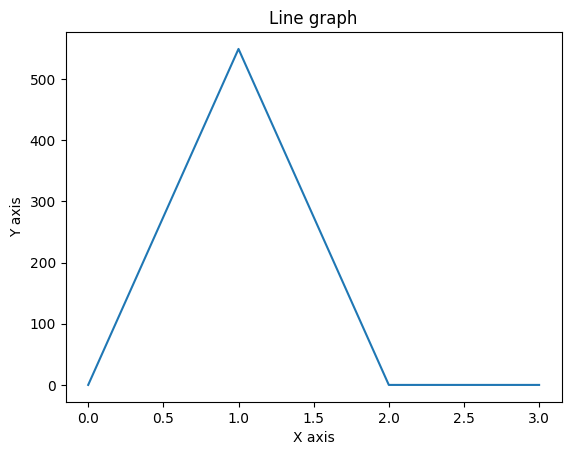

In [35]:
n_latency_days=5
day_index=50
previous_data_start_index = max(0, day_index - n_latency_days)
previous_data_end_index = max(0, day_index - 1)
previous_data = test.iloc[previous_data_start_index:previous_data_end_index]

ir_prv=np.array(previous_data['max_infection_rate'])
dr_prv=np.array(previous_data['max_death_rate'])
prv50_features=np.column_stack((ir_prv,dr_prv))
x = [0,1,2,3]
y = ir_prv

plt.plot(x,y)

plt.title("Line graph")
plt.ylabel('Y axis')
plt.xlabel('X axis')
plt.show()

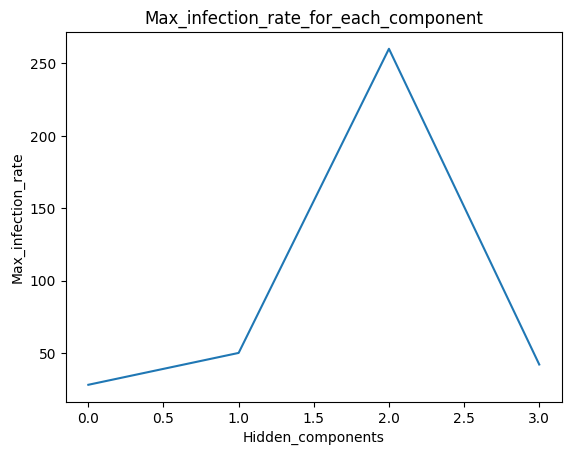

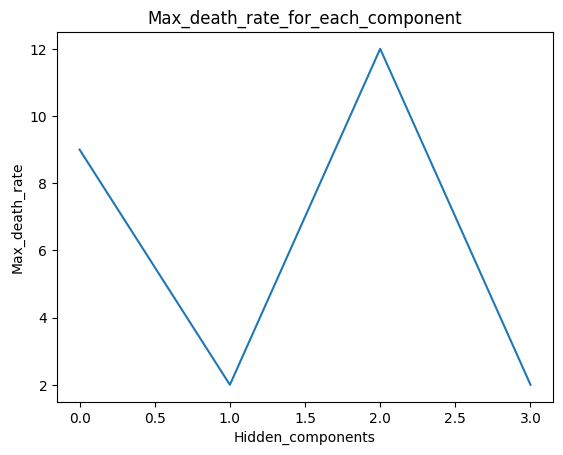

In [36]:
day_index=100
previous_data_start_index = max(0, day_index - n_latency_days)
previous_data_end_index = max(0, day_index - 1)
previous_data = test.iloc[previous_data_start_index:previous_data_end_index]

ir_prv=np.array(previous_data['max_infection_rate'])
dr_prv=np.array(previous_data['max_death_rate'])
prv100_features=np.column_stack((ir_prv,dr_prv))
x = [0,1,2,3]
y = ir_prv
z = dr_prv

plt.plot(x,y)

plt.title("Max_infection_rate_for_each_component")
plt.ylabel('Max_infection_rate')
plt.xlabel('Hidden_components')
plt.show()
plt.plot(x,z)
plt.title("Max_death_rate_for_each_component")
plt.ylabel('Max_death_rate')
plt.xlabel('Hidden_components')
plt.show()

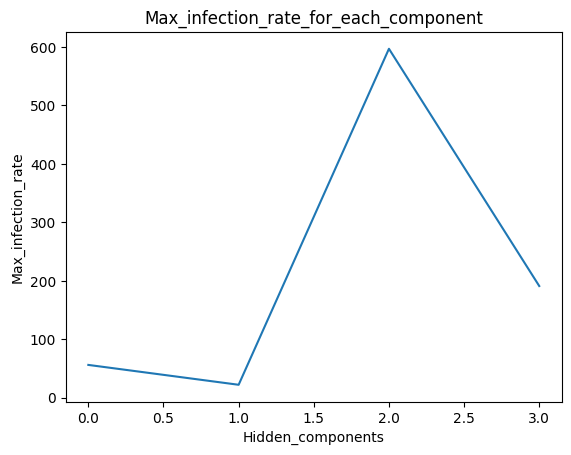

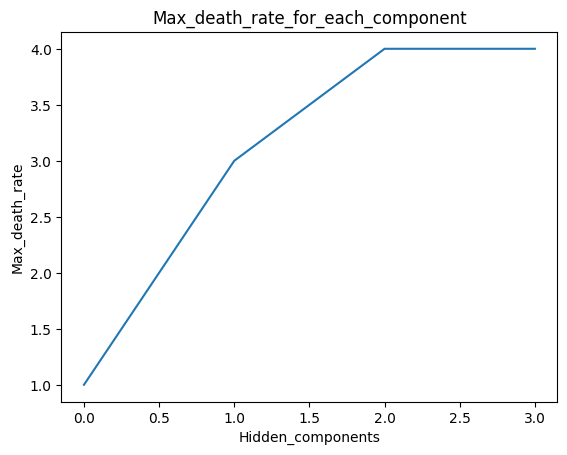

In [37]:
day_index=200
previous_data_start_index = max(0, day_index - n_latency_days)
previous_data_end_index = max(0, day_index - 1)
previous_data = test.iloc[previous_data_start_index:previous_data_end_index]

ir_prv=np.array(previous_data['max_infection_rate'])
dr_prv=np.array(previous_data['max_death_rate'])
prv200_features=np.column_stack((ir_prv,dr_prv))
x = [0,1,2,3]
y = ir_prv
z = dr_prv

plt.plot(x,y)

plt.title("Max_infection_rate_for_each_component")
plt.ylabel('Max_infection_rate')
plt.xlabel('Hidden_components')
plt.show()
plt.plot(x,z)
plt.title("Max_death_rate_for_each_component")
plt.ylabel('Max_death_rate')
plt.xlabel('Hidden_components')
plt.show()

In [38]:
outcome_score_50f=hm.score(prv50_features)
prediction_50f=hm.predict_proba(prv50_features)

outcome_score_100f=hm.score(prv100_features)
prediction_100f=hm.predict_proba(prv100_features)

outcome_score_200f=hm.score(prv200_features)
prediction_200f=hm.predict_proba(prv200_features)

In [39]:
print(outcome_score_50f,outcome_score_100f,outcome_score_200f)

-39.942681146787095 -37.62499707125573 -37.00203015434128


In [40]:
data = {'First 50 Days':  [outcome_score_50f],
        'First 100 Days': [outcome_score_100f],
         'First 200 Days': [outcome_score_200f]
        }
df_final = pd.DataFrame (data, columns = ['First 50 Days','First 100 Days', 'First 200 Days'])

In [41]:
df_final

First 50 Days  First 100 Days  First 200 Days
0     -39.942681      -37.624997       -37.00203

In [42]:
log_likelihood = hm.score(test)

In [43]:
print(log_likelihood)

-10940.666531719713
